In [1]:
import pandas as pd
import numpy as np

# Setting agar hasil acak kita sama
np.random.seed(42)

# ==========================================
# 1. KITA BUAT 1000 DATA RUMAH (DUMMY)
# ==========================================
jumlah_data = 1000

# Fitur A: Luas Tanah (antara 50 m2 sampai 300 m2)
luas_tanah = np.random.randint(50, 300, jumlah_data)

# Fitur B: Jumlah Kamar (antara 1 sampai 6)
jumlah_kamar = np.random.randint(1, 7, jumlah_data)

# Fitur C: Jarak ke Pusat Kota (antara 1 km sampai 30 km)
jarak_kota = np.random.uniform(1, 30, jumlah_data)

# Target: Harga Rumah (dalam Juta)
# Rumusnya: (Luas x 5jt) + (Kamar x 20jt) - (Jarak x 3jt) + BONUS ACAK (Noise)
# Noise ini penting supaya model nanti bisa Overfitting/Underfitting
harga_asli = (luas_tanah * 5) + (jumlah_kamar * 20) - (jarak_kota * 3)
pengganggu = np.random.normal(0, 50, jumlah_data) # Ini 'noise' atau variasi acak

harga_final = harga_asli + pengganggu

# ==========================================
# 2. BUNGKUS JADI DATAFRAME
# ==========================================
df = pd.DataFrame({
    'Luas_Tanah': luas_tanah,
    'Jumlah_Kamar': jumlah_kamar,
    'Jarak_Kota': jarak_kota,
    'Harga': harga_final
})

print("✅ Data Berhasil Dibuat Sendiri!")
print(df.head())

# ==========================================
# 3. SIAPKAN X DAN y UNTUK LATIHAN
# ==========================================
x = df[['Luas_Tanah', 'Jumlah_Kamar', 'Jarak_Kota']]
y = df['Harga']

# --- SILAKAN LANJUTKAN KODING DI BAWAH SINI ---
# (Paste kode train_test_split kamu di bawah ini)

✅ Data Berhasil Dibuat Sendiri!
   Luas_Tanah  Jumlah_Kamar  Jarak_Kota        Harga
0         152             1    4.725013   754.612204
1         229             3    9.216945  1147.640326
2         142             5    1.534404   788.597813
3          64             2   13.534983   341.031482
4         156             1   25.363524   694.191111


In [2]:
df

,Luas_Tanah,Jumlah_Kamar,Jarak_Kota,Harga
0,152,1,4.725013,754.612204
1,229,3,9.216945,1147.640326
2,142,5,1.534404,788.597813
3,64,2,13.534983,341.031482
4,156,1,25.363524,694.191111
...,...,...,...,...
995,297,1,20.768415,1440.850777
996,82,2,5.846828,420.647708
997,167,4,20.003190,828.588738
998,114,5,29.760536,592.697836


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Luas_Tanah    1000 non-null   int64  
 1   Jumlah_Kamar  1000 non-null   int64  
 2   Jarak_Kota    1000 non-null   float64
 3   Harga         1000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


In [4]:
df.describe()

,Luas_Tanah,Jumlah_Kamar,Jarak_Kota,Harga
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,178.500000,3.468000,15.376088,917.734729
std,71.610111,1.734354,8.258247,364.941159
min,50.000000,1.000000,1.009643,146.794180
25%,115.750000,2.000000,7.917905,612.668287
50%,180.000000,3.000000,15.546447,934.740682
75%,239.000000,5.000000,22.535893,1226.864434
max,299.000000,6.000000,29.915267,1635.259221


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(max_depth=50, random_state=42)
model.fit(x_train, y_train) 

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Train MSE : {train_mse}')
print(f'Test MSE : {test_mse}')


Train MSE : 0.0
Test MSE : 5839.308561652246


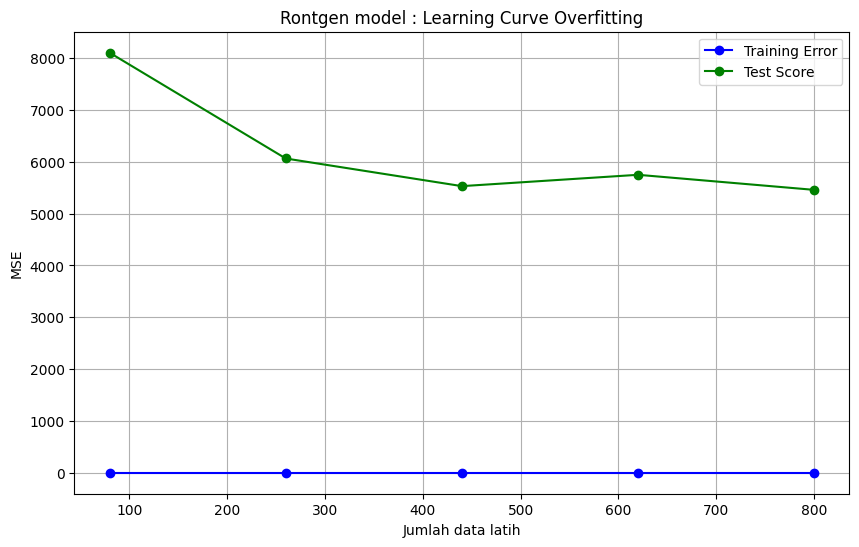

In [28]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_size, train_scores, test_scores = learning_curve(model, x, y, cv=5, scoring='neg_mean_squared_error', n_jobs = 1)

train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_size, train_mean, 'o-', color='blue', label='Training Error')
plt.plot(train_size, test_mean, '-o', color='green', label='Test Score')


plt.title('Rontgen model : Learning Curve Overfitting')
plt.xlabel('Jumlah data latih')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.show()

Karena data masih terlihat overfitting dan terlihat disana semakin besar data semakin kecil eror yang terjadi pada test, maka itu berarti setiap data yang bertambah akan membuat data belajar lebih baik. 
Eror yang sedikit pada data train mengindikasikan model keras kepala dan terus mempelajari pola-pola rumit yang kurang relevan. Cara pertama untuk mengatasinya adalah Regularization

In [46]:
model_dt_rg = DecisionTreeRegressor(max_depth=7, random_state=42)
model_dt_rg.fit(x_train, y_train)

y_train_pred_rg = model_dt_rg.predict(x_train)
y_test_pred_rg = model_dt_rg.predict(x_test)

mse_train_rg = mean_squared_error(y_train, y_train_pred_rg)
mse_test_rg = mean_squared_error(y_test, y_test_pred_rg)

print(f'Train MSE : {mse_train_rg}')
print(f'Test MSE : {mse_test_rg}')

Train MSE : 1456.2821949406225
Test MSE : 4600.855159803006
